In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
plt.rcParams["figure.figsize"] = (25,10)

plt.rcParams.update({'font.size': 22})

colors='bgrykcm'
symbol='*-+^'

In [2]:
import Numerov
import utils
import Hartree_XC
import numpy as np
import Atomic_Like_Potential as ALP
from Predictor_Corrector_RK4 import predictor_corrector_radial_shcrodinger_integrator
from Atomic_Like_Potential import V_eff
from Radial_Eigenfunction import Radial_Eigenfunction

In [3]:
kwargs={'delta_x': 0.001, 'r_N':10.0, 'l':0, 'Z':1.0, 'E':-0.5}
r_grid_reversed= utils.get_uniform_r_grid(**kwargs)
w10= 1.0e-7#u_hydr[0]
w20= (1.2e-8 - w10)//kwargs['delta_x']#(u_hydr[1] - u_hydr[0])/kwargs['delta_x']

In [4]:
r_max=0.6
grid_points=10
delta=0.001
rp= utils.get_rp(r_max, grid_points, delta)

ener_grid= -1.0*np.array(utils.get_exponential_grid(delta=delta, rp=rp, grid_points=grid_points))

In [5]:

u0_E=[]# u_func(r=0) as function of energy
for E in ener_grid:
    kwargs={'delta_x': 0.001, 'r_N':10.0, 'l':0, 'Z':1.0, 'E':E}
    u_func= predictor_corrector_radial_shcrodinger_integrator(r_grid_reversed, w10,w20, kwargs)
    u_func= utils.normalize_u_function(u_func, kwargs['delta_x'])
    u0_E.append(u_func[-1])
number_of_nodes, nodes_positions= utils.get_nodes_information(u0_E, ener_grid)

In [6]:
number_of_nodes

2

In [7]:
nodes_positions

[(-0.11952048063881804, -0.059730360201740815),
 (-0.5397296402032716, -0.4795195206411906)]

In [13]:
#secant method
temp_nodes_posi= nodes_positions[0]
N_max=100
tolerance=1.0e-6
i=0


p0= temp_nodes_posi[0]
kwargs={'delta_x': 0.001, 'r_N':10.0, 'l':0, 'Z':1.0, 'E':p0}
u_func= predictor_corrector_radial_shcrodinger_integrator(r_grid_reversed, w10,w20, kwargs)
u_func= utils.normalize_u_function(u_func, kwargs['delta_x'])
q0= u_func[-1]

p1= temp_nodes_posi[1]
kwargs={'delta_x': 0.001, 'r_N':10.0, 'l':0, 'Z':1.0, 'E':p1}
u_func= predictor_corrector_radial_shcrodinger_integrator(r_grid_reversed, w10,w20, kwargs)
u_func= utils.normalize_u_function(u_func, kwargs['delta_x'])
q1= u_func[-1]

while i < N_max:
    p= p1 - q1*(p1-p0)/(q1-q0)
    if abs(p-p1) < tolerance:
        break
    p0=p1
    q0=q1
    p1=p
    kwargs={'delta_x': 0.001, 'r_N':10.0, 'l':0, 'Z':1.0, 'E':p1}
    u_func= predictor_corrector_radial_shcrodinger_integrator(r_grid_reversed, w10,w20, kwargs)
    u_func= utils.normalize_u_function(u_func, kwargs['delta_x'])
    q1= u_func[-1]
    i+=1
print(i)
kwargs={'delta_x': 0.001, 'r_N':10.0, 'l':0, 'Z':1.0, 'E':p}
u_func= predictor_corrector_radial_shcrodinger_integrator(r_grid_reversed, w10,w20, kwargs)
u_func= utils.normalize_u_function(u_func, kwargs['delta_x'])

3


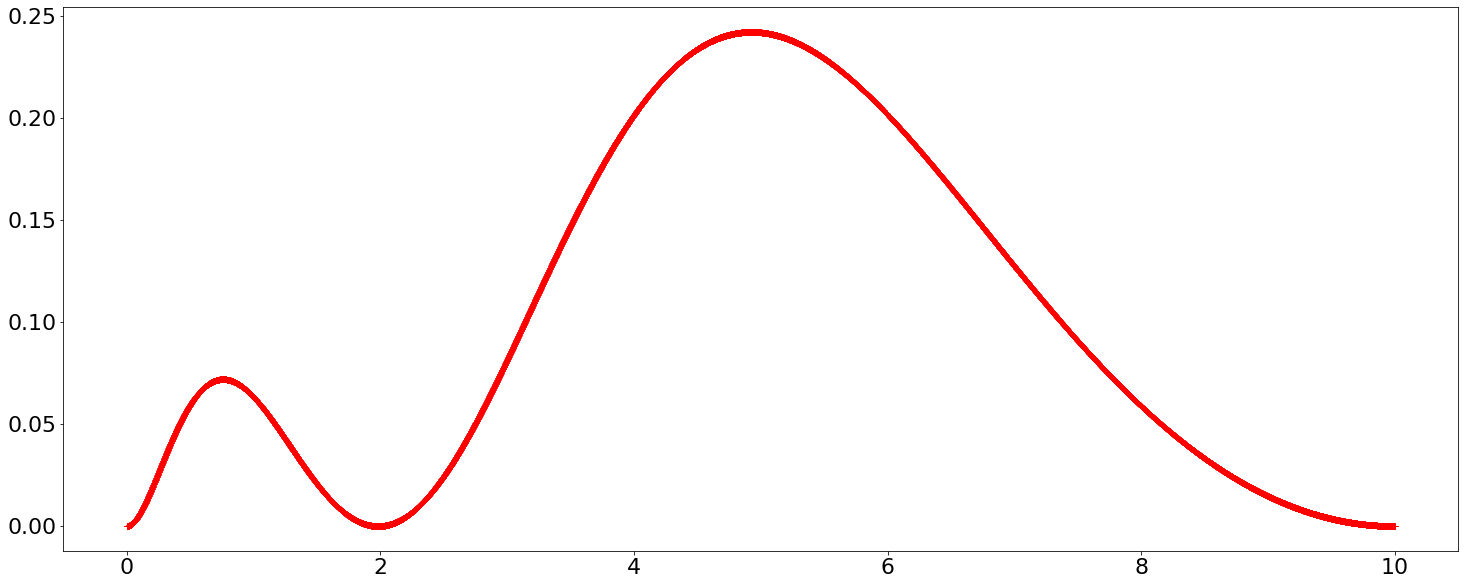

In [14]:
plt.plot(r_grid_reversed,np.array(u_func)**2,'r+')
plt.show()

In [17]:
u_func[-1]

7.056174246030256e-15

In [19]:
r_grid_reversed[-1]

1.0259154636926837e-13

In [16]:
r_grid_reversed[-1]

9.966808872359859e-12

In [19]:
u_func[-1]

1.9913800516305441e-10

In [20]:
u_func[0]

1.1714435248363741e-34

In [21]:
r_grid_reversed[0]

10.0

In [18]:
kwargs={'delta_x': 0.001, 'r_N':10.0, 'l':0, 'Z':1.0, 'E':-0.5}
u_func= predictor_corrector_radial_shcrodinger_integrator(r_grid_reversed, w10,w20, kwargs)
u_func= utils.normalize_u_function(u_func, kwargs['delta_x'])

In [9]:

u_hydr_normalized= utils.normalize_u_function(u_hydr, kwargs['delta_x'])

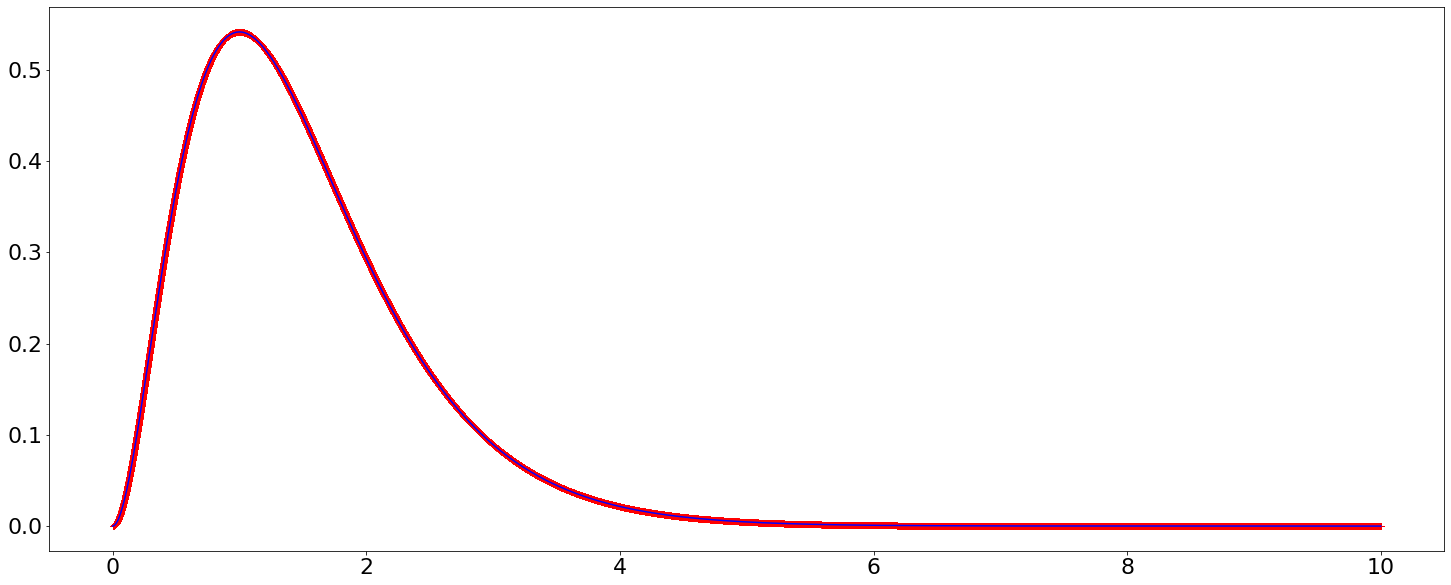

In [11]:
plt.plot(r_grid_reversed,np.array(u_func)**2,'r+', r_grid_reversed,u_hydr_normalized**2,'b-')
plt.show()

In [12]:
temp= np.abs(np.array(u_func)- u_hydr_normalized)

In [13]:
temp

array([9.07998640e-04, 9.08242635e-04, 9.08486638e-04, ...,
       8.00582647e-04, 4.00699798e-04, 7.36801628e-07])